<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [159]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [175]:
# Читаем файл csv

data = pd.read_csv(
    '/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/14/[SW.BAND] [Яндекс.Практикум] Специалист по Data Science Плюс. Часть 14 из 16 (2022)/[SW.BAND] 04 Самостоятельный проект/taxi.csv',
    parse_dates=[0],
    index_col=[0]
)
data.sort_index(inplace=True)

In [14]:
# Изучим данные

print('\033[1m' + 'Данные в таблице' + '\033[0m')
display(data.head())
print('\n' + '\033[1m' + 'Информация о таблице' + '\033[0m' + '\n')
display(data.info())
print('\n' + '\033[1m' + 'Колличество пропусков' + '\033[0m' + '\n')
display(data.isna().sum())
print('Index упорядочен:', df.index.is_monotonic_increasing)

Данные в таблице


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32



Информация о таблице

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None


Колличество пропусков



num_orders    0
dtype: int64

Index упорядочен: True


## Анализ

<Axes: xlabel='datetime'>

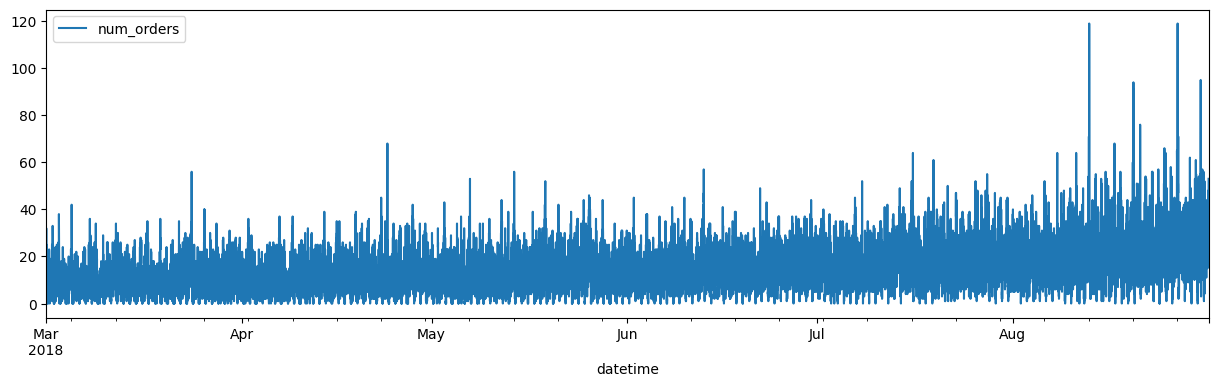

In [150]:
# Построим общий граффик

data.plot(figsize=(15, 4))

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_89728/840263998.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_month = data.resample('1M').sum()


<Axes: xlabel='datetime'>

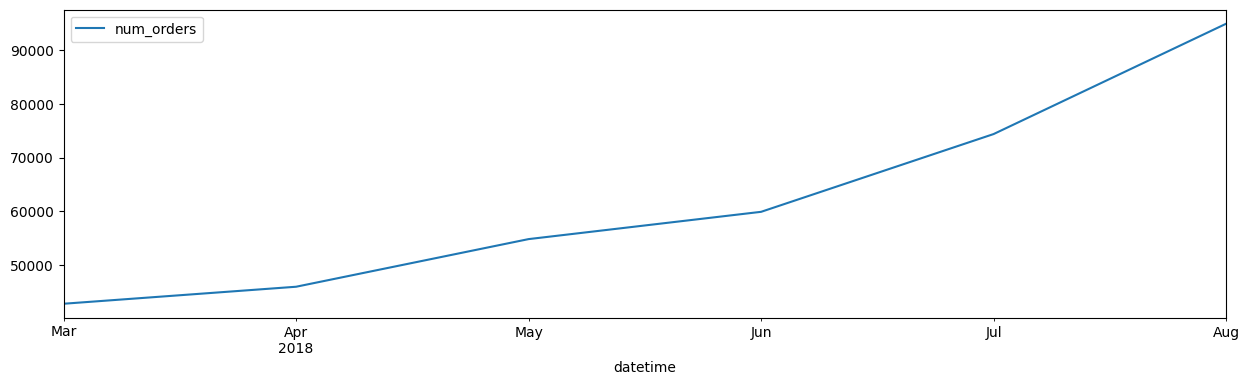

In [149]:
# Построим граффик по месяцам

data_month = data.resample('1M').sum()
data_month.plot(figsize=(15, 4))

<Axes: xlabel='datetime'>

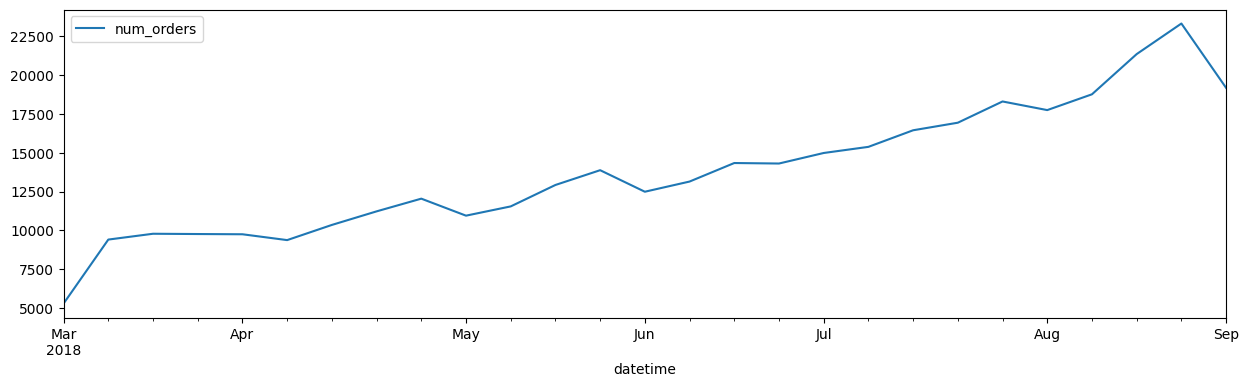

In [147]:
# Построим граффик по неделям

data_week = data.resample('1W').sum()
data_week.plot(figsize=(15, 4))

<Axes: xlabel='datetime'>

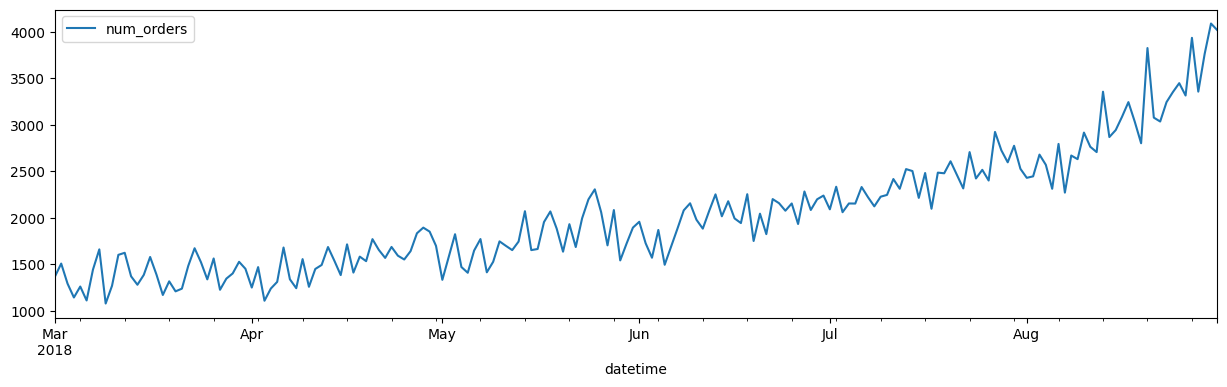

In [145]:
# Построим граффик по дням

data_day = data.resample('1D').sum()
data_day.plot(figsize=(15, 4))

<Axes: xlabel='datetime'>

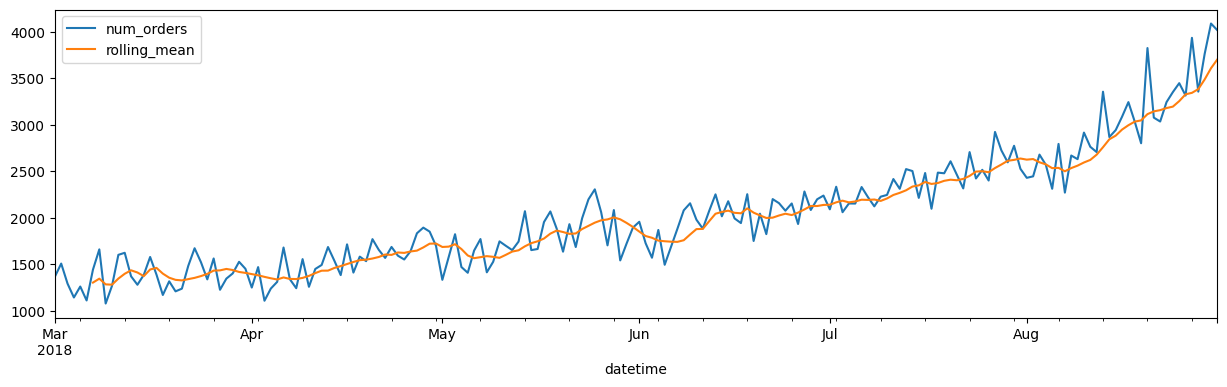

In [146]:
# Построим граффик скользящего среднего по дням

data_day['rolling_mean'] = data_day.rolling(7).mean()
data_day.plot(figsize=(15, 4))

<Axes: title={'center': 'Заказы по дням недели'}, xlabel='datetime'>

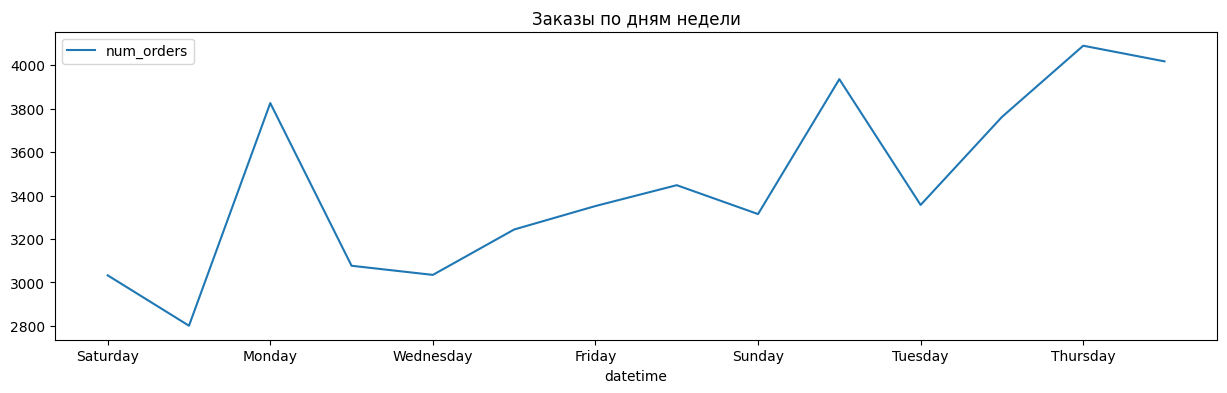

In [143]:
# Построим граффик заказов по дням недели

data_day_of_week = data.resample('1D').sum()
data_day_of_week.index = data_day_of_week.index.day_name()

data_day_of_week.tail(14).plot(title='Заказы по дням недели', figsize=(15, 4))

Text(0.5, 1.0, 'Сезонность заказов по дням')

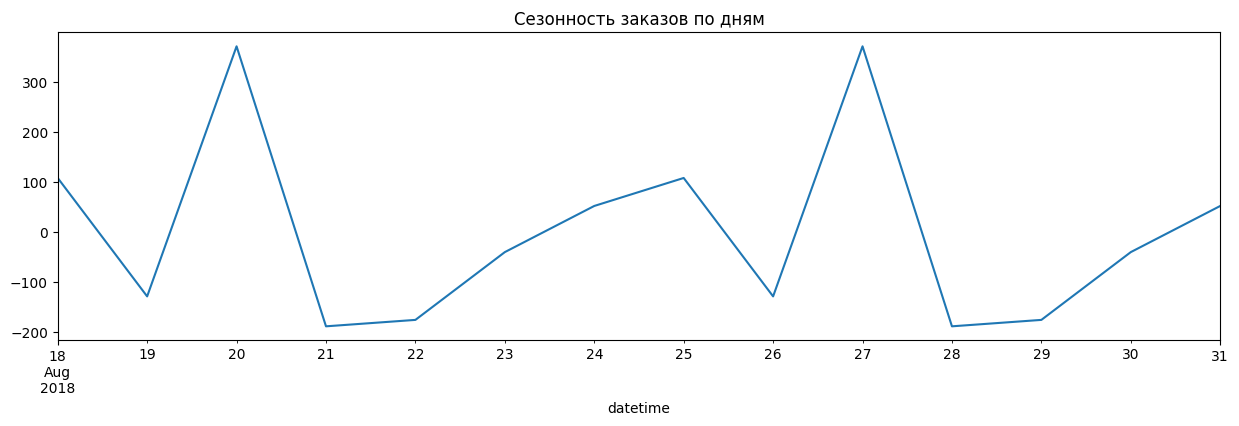

In [140]:
# Построим граффик сезонности заказов по дням недели

data_day = data.resample('1D').sum()

decomposed = seasonal_decompose(data_day.tail(14)) 

decomposed.seasonal.plot(ax=plt.gca(), figsize=(15, 4)) 
plt.title('Сезонность заказов по дням')

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_89728/963053714.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hour = data.resample('1H').sum()


Text(0.5, 1.0, 'Сезонность заказов по часам')

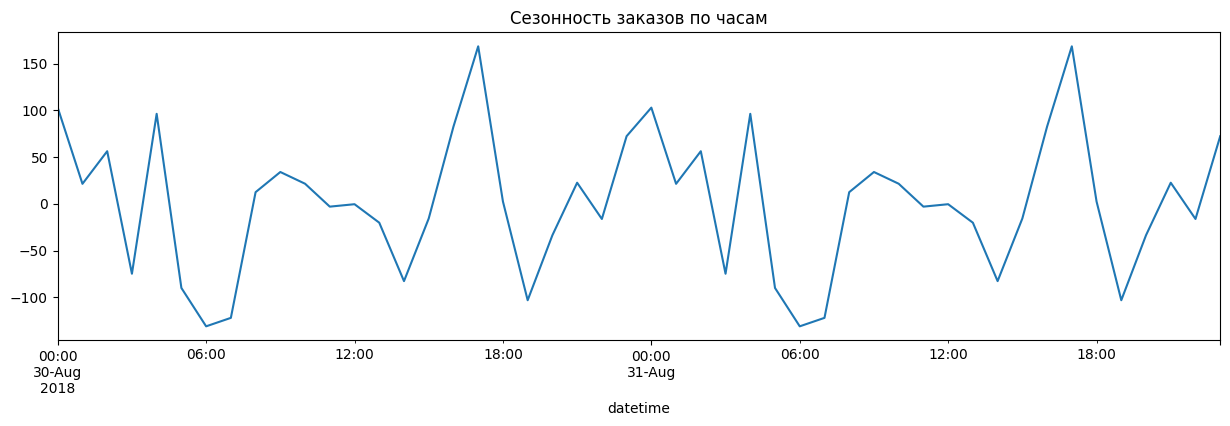

In [141]:
# Построим граффик сезонности заказов по часам

data_hour = data.resample('1H').sum()

decomposed = seasonal_decompose(data_hour.tail(48)) 

decomposed.seasonal.plot(ax=plt.gca(), figsize=(15, 4)) 
plt.title('Сезонность заказов по часам')

### Вывод
* Колличество заказов увеличивается с каждым месяцом
* Пик заказов приходится на понедельник
* Спад заказов по воскресеньям
* В течении дня пик заказов в 17.00. Минимум – в 6.00

## Обучение

In [202]:
df = data.resample('1H').sum()

def make_features(df, max_lag, rolling_mean_size):
    df['day'] = df.index.day
    df['hour'] = df.index.hour

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_89728/905790128.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = data.resample('1H').sum()


In [203]:
make_features(df, 48, 48)

train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop('num_orders', axis = 1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis = 1)
y_test = test['num_orders']

model = LinearRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
print('RMSE на обучающей выборке:', mean_squared_error(y_train, preds_train) ** 0.5)

RMSE на обучающей выборке: 23.448326584216304


## Тестирование

In [204]:
preds_test = model.predict(X_test)
print('RMSE на тестовой выборке:', mean_squared_error(y_test, preds_test) ** 0.5)

RMSE на тестовой выборке: 41.84340365798045


In [ ]:
### Вывод
Линейная регрессия сразу проходит границу RMSE: 48. 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48